In [200]:
import gym
from frozen_lake import FrozenLake
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from tqdm import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
env = gym.make('FrozenLake-v1')

In [235]:
holes = []
time_counter = []
score=[]
epi_count = np.linspace(10,5000,100)

In [236]:
for count in tqdm(epi_count):
    start = time.monotonic()
    frozen = FrozenLake(env=env, episodes=int(count), epsilon=0.002, gamma=0.85)
    frozen.train()
    time_counter.append(round(time.monotonic()-start,2))
    score.append(frozen.test())
    holes.append(int(frozen.hole_counter))

100%|██████████| 100/100 [00:56<00:00,  1.76it/s]


Text(0, 0.5, 'Počet spadnutí do otvoru v ledu')

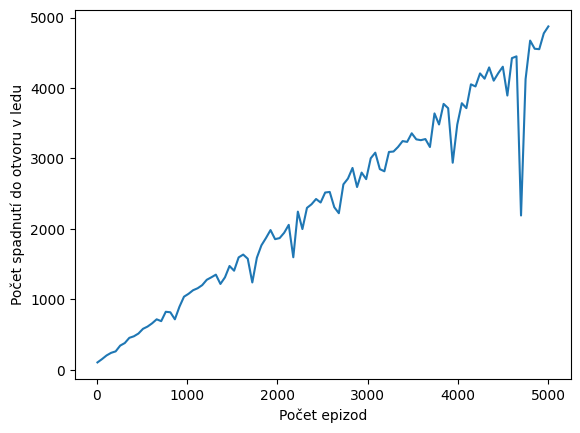

In [240]:
plt.plot(epi_count, holes)
plt.xlabel("Počet epizod")
plt.ylabel("Počet spadnutí do otvoru v ledu")

Text(0, 0.5, 'Skóre')

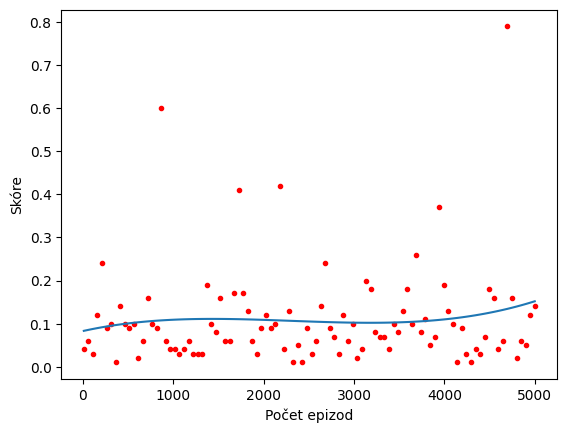

In [238]:
x = np.linspace(0, epi_count[-1], len(epi_count))
spl = scipy.interpolate.UnivariateSpline(x, score)
y = spl(x)
# score
plt.plot(epi_count,score,'r.')
plt.plot(epi_count,y)
plt.xlabel("Počet epizod")
plt.ylabel("Skóre")

Text(0, 0.5, 'Čas[s]')

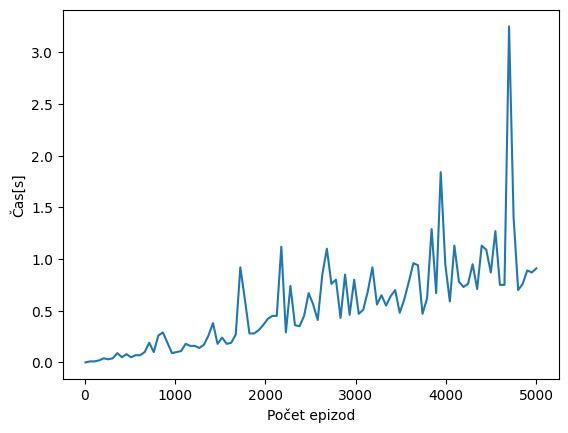

In [239]:
plt.plot(epi_count,time_counter)
plt.xlabel("Počet epizod")
plt.ylabel("Čas[s]")

In [69]:
test = FrozenLake(env=env, episodes=1000, epsilon=0.001, gamma=0.9)

In [70]:
test.policy

{0: {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5},
 1: {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33},
 2: {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33},
 3: {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5},
 4: {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33},
 5: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 6: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 7: {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33},
 8: {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33},
 9: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 10: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 11: {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33},
 12: {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5},
 13: {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33},
 14: {0: 0.33, 1: 0.33, 2: 0.33, 3: 0.33},
 15: {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}}

In [34]:
test.Q

{0: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 1: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 2: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 3: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 4: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 5: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 6: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 7: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 8: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 9: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 10: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 11: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 12: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 13: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 14: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 15: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}}

In [5]:
env = gym.make('FrozenLake-v1', render_mode="human",map_name="4x4")
env.reset()
env.render()
time.sleep(2)
env.step(0)
time.sleep(1)
env.close()